In [24]:
!pip install pdfplumber
!pip install PyMuPDF
!pip install nltk
!pip install python-docx
!pip install nltk
!pip install docx
!pip install transformers

In [25]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [26]:
import pdfplumber
import nltk
import fitz
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.probability import FreqDist
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize.treebank import TreebankWordDetokenizer
from nltk.corpus import wordnet
import string
import re
from transformers import pipeline
import docx
import os

In [27]:
def load_text_from_file(file_path):
    _, file_extension = os.path.splitext(file_path)
    file_extension = file_extension.lower()

    if file_extension == '.txt':
        return load_text_from_txt(file_path)
    elif file_extension == '.pdf':
        return load_text_from_pdf(file_path)
    elif file_extension == '.docx':
        return load_text_from_docx(file_path)
    else:
        print(f"Unsupported file type: {file_extension}")
        return None

In [28]:
def load_text_from_txt(file_path):
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            text = file.read()
        return text
    except Exception as e:
        print(f"Error loading text from {file_path}: {e}")
        return None

In [29]:
def load_text_from_pdf(file_path):
    text = ""
    try:
        document = fitz.open(file_path)
        for page_num in range(len(document)):
            page = document.load_page(page_num)
            page_text = page.get_text()
            text += page_text + "\n"
        document.close()
    except Exception as e:
        print(f"Error loading text from {file_path}: {e}")
    return text

In [30]:
def load_text_from_docx(file_path):
    text = ""
    try:
        doc = docx.Document(file_path)
        for para in doc.paragraphs:
            text += para.text + "\n"
    except Exception as e:
        print(f"Error loading text from {file_path}: {e}")
    return text

In [31]:
files = ["/content/Artificial Intelligence and Machine Learning Article.docx"
    ,
]

In [32]:
for file_path in files:
    text = load_text_from_file(file_path)
    if text:
        print(f"Text from {file_path}:")
        print(text)
        print()



Text from /content/Artificial Intelligence and Machine Learning Article.docx:
Artificial Intelligence and Machine Learning: Improvements, Encounters, and Future Predictions
By: Arthur Muhwezi, Dafiewhare Emmanuel, Able, Richard Twebaze
Acronyms
AI – Artificial Intelligence
ML – Machine Learning

Abstract: 
This journal article provides a comprehensive evaluation of recent improvements in AI and ML, exploring key methodologies, applications, and the implications of these technologies.
Since the main aim of this article is to evaluate knowledge, attitudes, behaviors, and opinions of other researchers in this line of study, the qualitative research methodology was enforced in conducting the study.
Cutting-edge research findings are showcased, highlighting remarkable achievements and breakthroughs in the field. Additionally, we address the challenges and ethical considerations associated with AI and ML utilization, while also outlining potential future directions for continued progress.
In

In [44]:
from nltk.tokenize import word_tokenize

def preprocess_text(text):
    # Tokenize the text into words
    words = word_tokenize(text)

    # Initialize lemmatizer and stopwords list
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))

    # Lemmatize words and remove stopwords
    processed_words = [lemmatizer.lemmatize(word) for word in words if word.lower() not in stop_words]

    # Join the processed words back into a single string
    processed_text = ' '.join(processed_words)

    return processed_text
processed_text = preprocess_text(text)

print("\nProcessed Text:")
print(processed_text)





Processed Text:
Artificial Intelligence Machine Learning Improvements Encounters Future Predictions Arthur Muhwezi Dafiewhare Emmanuel Able Richard Twebaze Acronyms AI Artificial Intelligence ML Machine Learning Abstract journal article provides comprehensive evaluation recent improvement AI ML exploring key methodology application implication technology Since main aim article evaluate knowledge attitude behavior opinion researcher line study qualitative research methodology enforced conducting study Cutting edge research finding showcased highlighting remarkable achievement breakthrough field Additionally address challenge ethical consideration associated AI ML utilization also outlining potential future direction continued progress Introduction rapidly evolving landscape technology two groundbreaking field emerged frontrunners reshaping industry transforming economy redefining human interaction machine field Artificial Intelligence AI Machine Learning ML convergence AI ML propelled 

In [34]:
import re
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [35]:
OGword_counts = len(text)
print(OGword_counts)
word_counts = len(processed_text)
print(word_counts)

8942
7539


In [45]:
text = re.sub(r'\W+', ' ', processed_text)  # Remove non-word characters

# Count word frequencies
word_counts = Counter(text.split())

# Get the top 20 words with highest frequency
top_20_words = word_counts.most_common(25)

# Print the results
for word, count in top_20_words:
    print(f'{word}: {count}')

AI: 43
ML: 23
model: 12
challenge: 9
human: 8
Learning: 7
data: 7
like: 7
Artificial: 6
Intelligence: 6
Machine: 6
improvement: 6
field: 6
become: 6
learning: 6
making: 6
datasets: 6
future: 5
system: 5
algorithm: 5
Improvements: 4
methodology: 4
application: 4
address: 4
ethical: 4


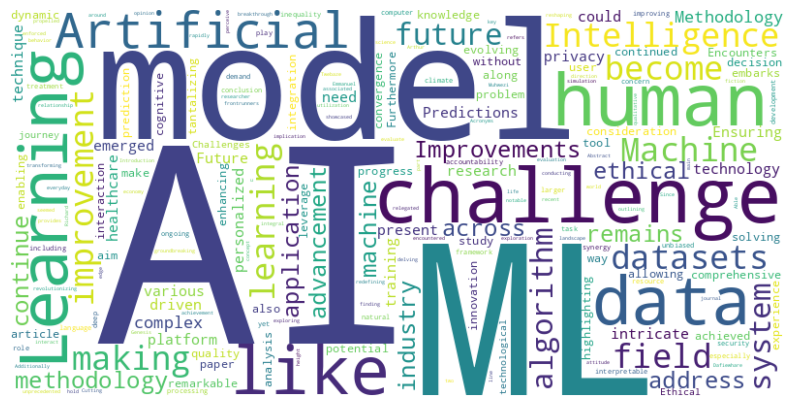

In [46]:
# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='White').generate_from_frequencies(word_counts)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [42]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each